In [1]:
# Import Libs
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Reshape, Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, UpSampling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
# For wide monitor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 문제 1번, 딥러닝 모델 구조 설계

In [7]:
data = pd.read_csv('test (1).csv', header=None, skiprows=1).values
print(data.shape)

(3999, 12289)


In [8]:
# Split
train, test = train_test_split(data, test_size=0.3, random_state=1)
print(train.shape)
print(test.shape)

(2799, 12289)
(1200, 12289)


In [25]:
# X, Y Def.
Y_train, X_train = np_utils.to_categorical(train[:, 0]), train[:, 1:]
Y_test, X_test = np_utils.to_categorical(test[:, 0]), test[:, 1:]
print(Y_train.shape, X_train.shape)
print(Y_test.shape, X_test.shape)

(2799, 3) (2799, 12288)
(1200, 3) (1200, 12288)


In [29]:
X_train = np.reshape(X_train, (-1,64, 64,3))
X_test = np.reshape(X_test, (-1,64, 64,3))

In [28]:
X_train.shape

(2799, 64, 64, 3)

In [11]:
# Normalzation
X_train = (X_train)/255.
X_test = (X_test)/255.

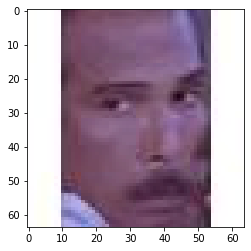

In [20]:
# Visualization
plt.imshow(np.reshape(X_train[0], (64,64,3)), cmap=plt.cm.gray_r)

In [30]:
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.pooling import MaxPooling2D

In [44]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same', activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

In [45]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

In [46]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 128)         147584    
__________

In [48]:
history = model.fit(X_train, Y_train, batch_size=256, epochs=20, verbose=2, validation_data=[X_test, Y_test])

Train on 2799 samples, validate on 1200 samples
Epoch 1/20
 - 23s - loss: 0.4893 - acc: 0.7967 - val_loss: 0.7459 - val_acc: 0.6658
Epoch 2/20
 - 22s - loss: 0.4804 - acc: 0.8024 - val_loss: 0.6039 - val_acc: 0.7592
Epoch 3/20
 - 23s - loss: 0.4500 - acc: 0.8235 - val_loss: 0.7193 - val_acc: 0.7392
Epoch 4/20
 - 23s - loss: 0.4218 - acc: 0.8342 - val_loss: 0.6789 - val_acc: 0.7375
Epoch 5/20
 - 22s - loss: 0.3741 - acc: 0.8549 - val_loss: 0.6293 - val_acc: 0.7583
Epoch 6/20
 - 21s - loss: 0.3628 - acc: 0.8503 - val_loss: 1.0428 - val_acc: 0.6675
Epoch 7/20
 - 22s - loss: 0.3486 - acc: 0.8689 - val_loss: 0.7664 - val_acc: 0.7258
Epoch 8/20
 - 22s - loss: 0.2766 - acc: 0.8942 - val_loss: 0.8681 - val_acc: 0.7400
Epoch 9/20
 - 21s - loss: 0.3118 - acc: 0.8814 - val_loss: 0.6183 - val_acc: 0.7850
Epoch 10/20
 - 22s - loss: 0.2170 - acc: 0.9246 - val_loss: 1.1387 - val_acc: 0.7300
Epoch 11/20
 - 21s - loss: 0.2392 - acc: 0.9132 - val_loss: 0.8002 - val_acc: 0.7833
Epoch 12/20
 - 21s - loss:

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

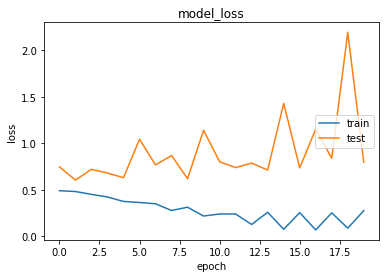

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# 문제 2,3번. 

### 하이퍼파라미터 찾기

In [52]:
# 하이퍼파라미터 제시
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same', activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 128)         147584    
__________

In [54]:
history = model.fit(X_train, Y_train, batch_size=256, epochs=10, verbose=2, validation_data=[X_test, Y_test])

Train on 2799 samples, validate on 1200 samples
Epoch 1/10
 - 21s - loss: 0.9536 - acc: 0.5091 - val_loss: 0.9412 - val_acc: 0.5133
Epoch 2/10
 - 21s - loss: 0.9400 - acc: 0.5145 - val_loss: 0.9317 - val_acc: 0.5483
Epoch 3/10
 - 22s - loss: 0.9241 - acc: 0.5370 - val_loss: 0.9204 - val_acc: 0.5450
Epoch 4/10
 - 21s - loss: 0.9038 - acc: 0.5627 - val_loss: 0.8977 - val_acc: 0.6058
Epoch 5/10
 - 22s - loss: 0.8573 - acc: 0.6195 - val_loss: 0.8594 - val_acc: 0.6075
Epoch 6/10
 - 22s - loss: 0.8166 - acc: 0.6452 - val_loss: 0.8025 - val_acc: 0.6350
Epoch 7/10
 - 23s - loss: 0.7969 - acc: 0.6434 - val_loss: 0.7724 - val_acc: 0.6625
Epoch 8/10
 - 23s - loss: 0.7585 - acc: 0.6745 - val_loss: 0.7349 - val_acc: 0.6817
Epoch 9/10
 - 24s - loss: 0.7512 - acc: 0.6788 - val_loss: 0.7645 - val_acc: 0.6683
Epoch 10/10
 - 24s - loss: 0.7181 - acc: 0.6927 - val_loss: 0.7261 - val_acc: 0.6733


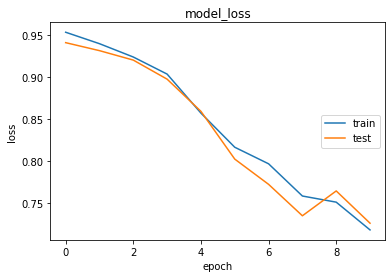

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [57]:
Y_test_hat = model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_test_hat, axis=1)))

[[309 142   0]
 [117 499   0]
 [ 35  98   0]]


### 각기 다른 모델 5개 제시 및 confusion matrix, 분석

In [166]:
# 1. 
# con pool 개수 3개
model1 = Sequential()
model1.add(Conv2D(64,(3,3),padding='same', activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D((2,2)))

In [167]:
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(3, activation='softmax'))
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 8192)              0         
__________

In [77]:
history = model1.fit(X_train, Y_train, batch_size=256, epochs=10, verbose=2, validation_data=[X_test, Y_test])

Train on 2799 samples, validate on 1200 samples
Epoch 1/10
 - 20s - loss: 1.1905 - acc: 0.4666 - val_loss: 0.9899 - val_acc: 0.3758
Epoch 2/10
 - 22s - loss: 0.9629 - acc: 0.4723 - val_loss: 0.9388 - val_acc: 0.5133
Epoch 3/10
 - 20s - loss: 0.9562 - acc: 0.5098 - val_loss: 0.9326 - val_acc: 0.5692
Epoch 4/10
 - 20s - loss: 0.9415 - acc: 0.5202 - val_loss: 0.9093 - val_acc: 0.5667
Epoch 5/10
 - 20s - loss: 0.9144 - acc: 0.5448 - val_loss: 0.8886 - val_acc: 0.5992
Epoch 6/10
 - 19s - loss: 0.8850 - acc: 0.5713 - val_loss: 0.8594 - val_acc: 0.6017
Epoch 7/10
 - 18s - loss: 0.8519 - acc: 0.6149 - val_loss: 0.8268 - val_acc: 0.6200
Epoch 8/10
 - 18s - loss: 0.8266 - acc: 0.6302 - val_loss: 0.8034 - val_acc: 0.6325
Epoch 9/10
 - 19s - loss: 0.7854 - acc: 0.6563 - val_loss: 0.8087 - val_acc: 0.6675
Epoch 10/10
 - 19s - loss: 0.7751 - acc: 0.6613 - val_loss: 0.7555 - val_acc: 0.6592


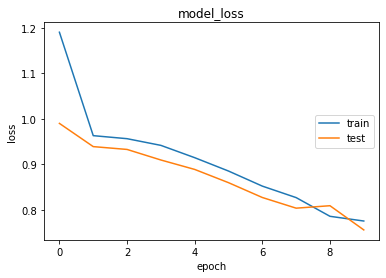

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [80]:
Y_test_hat = model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_test_hat, axis=1)))

[[364  87   0]
 [189 427   0]
 [ 67  66   0]]


In [168]:
# 2.
# con pool 개수 4개
model2 = Sequential()
model2.add(Conv2D(64,(3,3),padding='same', activation='relu', input_shape=(64,64,3)))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 8, 8, 128)         147584    
__________

In [64]:
history = model2.fit(X_train, Y_train, batch_size=256, epochs=10, verbose=2, validation_data=[X_test, Y_test])

Train on 2799 samples, validate on 1200 samples
Epoch 1/10
 - 22s - loss: 1.0315 - acc: 0.4319 - val_loss: 0.9812 - val_acc: 0.5133
Epoch 2/10
 - 21s - loss: 0.9664 - acc: 0.4923 - val_loss: 0.9520 - val_acc: 0.5133
Epoch 3/10
 - 21s - loss: 0.9530 - acc: 0.5134 - val_loss: 0.9508 - val_acc: 0.5133
Epoch 4/10
 - 23s - loss: 0.9451 - acc: 0.5173 - val_loss: 0.9543 - val_acc: 0.5142
Epoch 5/10
 - 23s - loss: 0.9447 - acc: 0.5263 - val_loss: 0.9165 - val_acc: 0.5525
Epoch 6/10
 - 21s - loss: 0.9015 - acc: 0.5566 - val_loss: 0.8987 - val_acc: 0.5800
Epoch 7/10
 - 21s - loss: 0.8849 - acc: 0.5931 - val_loss: 0.9265 - val_acc: 0.5392
Epoch 8/10
 - 21s - loss: 0.8466 - acc: 0.6099 - val_loss: 0.8011 - val_acc: 0.6317
Epoch 9/10
 - 22s - loss: 0.8097 - acc: 0.6502 - val_loss: 0.9165 - val_acc: 0.5567
Epoch 10/10
 - 22s - loss: 0.7897 - acc: 0.6563 - val_loss: 0.7392 - val_acc: 0.6683


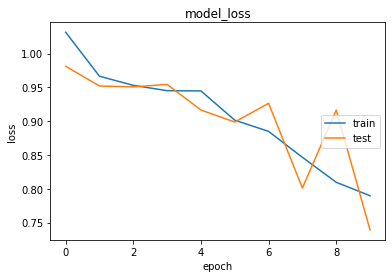

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [67]:
Y_test_hat = model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_test_hat, axis=1)))

[[350 101   0]
 [164 452   0]
 [ 44  89   0]]


In [169]:
# 3.
# con pool 개수 2개
model3 = Sequential()
model3.add(Conv2D(64,(3,3),padding='same', activation='relu', input_shape=(64,64,3)))
model3.add(MaxPooling2D((2,2)))
model3.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model3.add(MaxPooling2D((2,2)))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(3, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_131 (Conv2D)          (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                1048640   
_________________________________________________________________
dropout_40 (Dropout)         (None, 64)                0         
__________

In [82]:
history = model3.fit(X_train, Y_train, batch_size=256, epochs=10, verbose=2, validation_data=[X_test, Y_test])

Train on 2799 samples, validate on 1200 samples
Epoch 1/10
 - 16s - loss: 1.2053 - acc: 0.4712 - val_loss: 1.0227 - val_acc: 0.5133
Epoch 2/10
 - 16s - loss: 0.9804 - acc: 0.4987 - val_loss: 0.9422 - val_acc: 0.5142
Epoch 3/10
 - 17s - loss: 0.9452 - acc: 0.5177 - val_loss: 0.9236 - val_acc: 0.5642
Epoch 4/10
 - 15s - loss: 0.9256 - acc: 0.5627 - val_loss: 0.9071 - val_acc: 0.5558
Epoch 5/10
 - 15s - loss: 0.8994 - acc: 0.5777 - val_loss: 0.8725 - val_acc: 0.5942
Epoch 6/10
 - 15s - loss: 0.8527 - acc: 0.6120 - val_loss: 0.8236 - val_acc: 0.6058
Epoch 7/10
 - 15s - loss: 0.8088 - acc: 0.6392 - val_loss: 0.7977 - val_acc: 0.6342
Epoch 8/10
 - 16s - loss: 0.7759 - acc: 0.6517 - val_loss: 0.8163 - val_acc: 0.6350
Epoch 9/10
 - 16s - loss: 0.7583 - acc: 0.6592 - val_loss: 0.7513 - val_acc: 0.6650
Epoch 10/10
 - 16s - loss: 0.7140 - acc: 0.6842 - val_loss: 0.7310 - val_acc: 0.6708


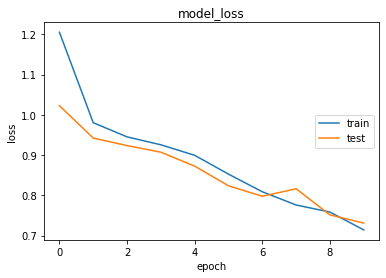

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [84]:
Y_test_hat = model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_test_hat, axis=1)))

[[327 124   0]
 [138 478   0]
 [ 37  96   0]]


In [170]:
# 4. 
# con pool 개수 

model4 = Sequential()
model4.add(Conv2D(64, (3, 3),padding='same', activation='relu', input_shape=(64,64,3)))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(128, (3, 3),padding='same', activation='relu', input_shape=(64,64,3)))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(3, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


model4.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 8192)              0         
__________

In [217]:
history = model4.fit(X_train, Y_train, batch_size=16, epochs=10, verbose=2, validation_data=[X_test, Y_test])

Train on 2799 samples, validate on 1200 samples
Epoch 1/10
 - 34s - loss: 0.5947 - acc: 0.6700 - val_loss: 0.5566 - val_acc: 0.7025
Epoch 2/10
 - 33s - loss: 0.5298 - acc: 0.7388 - val_loss: 0.4988 - val_acc: 0.7575
Epoch 3/10
 - 34s - loss: 0.4943 - acc: 0.7705 - val_loss: 0.4731 - val_acc: 0.7836
Epoch 4/10
 - 34s - loss: 0.4666 - acc: 0.7861 - val_loss: 0.4668 - val_acc: 0.7681
Epoch 5/10
 - 34s - loss: 0.4366 - acc: 0.8016 - val_loss: 0.4386 - val_acc: 0.8033
Epoch 6/10
 - 34s - loss: 0.4147 - acc: 0.8133 - val_loss: 0.4395 - val_acc: 0.7936
Epoch 7/10
 - 34s - loss: 0.3774 - acc: 0.8359 - val_loss: 0.4023 - val_acc: 0.8228
Epoch 8/10
 - 35s - loss: 0.3471 - acc: 0.8470 - val_loss: 0.4550 - val_acc: 0.8094
Epoch 9/10
 - 69105s - loss: 0.3216 - acc: 0.8614 - val_loss: 0.4384 - val_acc: 0.8283
Epoch 10/10
 - 36s - loss: 0.2882 - acc: 0.8820 - val_loss: 0.4018 - val_acc: 0.8447


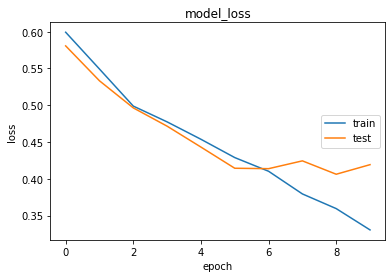

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [74]:
Y_test_hat = model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_test_hat, axis=1)))

[[248 197   6]
 [ 27 580   9]
 [  9  86  38]]


In [172]:
# 5. 
# 가장 성능이 좋았던 4번에서 layer추가
model5 = Sequential()
model5.add(Conv2D(64, (3, 3),padding='same', activation='relu', input_shape=(64,64,3)))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(128, (3, 3),padding='same', activation='relu', input_shape=(64,64,3)))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(3, activation='sigmoid'))

model5.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_140 (Conv2D)          (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 8, 8, 128)         73856     
__________

In [218]:
history = model5.fit(X_train, Y_train, batch_size=16, epochs=20, verbose=2, validation_data=[X_test, Y_test])

Train on 2799 samples, validate on 1200 samples
Epoch 1/20
 - 49s - loss: 0.5873 - acc: 0.6642 - val_loss: 0.5893 - val_acc: 0.6756
Epoch 2/20
 - 36s - loss: 0.5717 - acc: 0.6742 - val_loss: 0.5513 - val_acc: 0.7058
Epoch 3/20
 - 35s - loss: 0.5316 - acc: 0.7303 - val_loss: 0.5032 - val_acc: 0.7633
Epoch 4/20
 - 36s - loss: 0.4910 - acc: 0.7681 - val_loss: 0.4799 - val_acc: 0.7672
Epoch 5/20
 - 29s - loss: 0.4681 - acc: 0.7836 - val_loss: 0.4630 - val_acc: 0.7925
Epoch 6/20
 - 30s - loss: 0.4482 - acc: 0.7956 - val_loss: 0.4413 - val_acc: 0.8011
Epoch 7/20
 - 31s - loss: 0.4193 - acc: 0.8093 - val_loss: 0.4096 - val_acc: 0.8103
Epoch 8/20
 - 33s - loss: 0.3974 - acc: 0.8283 - val_loss: 0.4055 - val_acc: 0.8089
Epoch 9/20
 - 32s - loss: 0.3687 - acc: 0.8408 - val_loss: 0.4158 - val_acc: 0.8167
Epoch 10/20
 - 34s - loss: 0.3292 - acc: 0.8545 - val_loss: 0.4969 - val_acc: 0.8078
Epoch 11/20
 - 32s - loss: 0.3002 - acc: 0.8736 - val_loss: 0.3816 - val_acc: 0.8394
Epoch 12/20
 - 31s - loss:

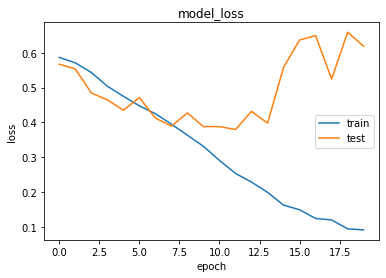

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [88]:
Y_test_hat = model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_test_hat, axis=1)))

[[331 118   2]
 [ 58 538  20]
 [ 15  48  70]]


# 문제 4번. 앙상블 방법

In [141]:
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

In [219]:
import scipy

train_labels = []
models = [model4,model5]
for m in models:
    predicts = np.argmax(m.predict(X_train), axis=1)
    train_labels.append(predicts)
        
train_labels = np.array(train_labels)
train_labels = np.transpose(train_labels, (1, 0))
train_labels = scipy.stats.mode(train_labels, axis=1)[0]
train_labels = np.squeeze(train_labels)

test_labels = []
models = [model4,model5]
for m in models:
    predicts = np.argmax(m.predict(X_test), axis=1)
    test_labels.append(predicts)
    
    if m == model4: 
        test_labels.append(predicts)
        
test_labels = np.array(test_labels)
test_labels = np.transpose(test_labels, (1, 0))
test_labels = scipy.stats.mode(test_labels, axis=1)[0]
test_labels = np.squeeze(test_labels)

In [220]:
print('train accuracy score: ', accuracy_score(np.argmax(Y_train,1),train_labels))
print('test accuracy score: ', accuracy_score(np.argmax(Y_test,1),test_labels))

train accuracy score:  0.9253304751697035
test accuracy score:  0.7558333333333334


In [142]:
def mlp_model():
    model = Sequential()
    model.add(Dense(50, input_shape = (64,64,3)))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [151]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from keras.optimizers import Adam # I believe this is better optimizer for our case
from keras.preprocessing.image import ImageDataGenerator # to augmenting our images for increasing accuracy
from keras.utils.vis_utils import plot_model
import scipy
from sklearn.model_selection import train_test_split # to split our train data into train and validation sets
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.random.seed(13) # My lucky number

In [155]:
num_classes = 3 # We have 10 digits to identify
batch_size = 128 # Handle 128 pictures at each round
epochs = 10 
img_rows, img_cols = 64, 64 # Image dimensions 28 pixels in height&width
input_shape = (img_rows, img_cols,3) # We'll use this while building layers


In [157]:
def model_cnn(input_shape=input_shape, num_classes=num_classes):   
    model = Sequential()

    # Add convolutional layer consisting of 32 filters and shape of 3x3 with ReLU activation
    # We want to preserve more information for following layers so we use padding
    # 'Same' padding tries to pad evenly left and right, 
    # but if the amount of columns to be added is odd, it will add the extra column to the right
    model.add(Conv2D(64, kernel_size = (3,3), activation='relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
    model.add(BatchNormalization())

    # Add convolutional layer consisting of 32 filters and shape of 5x5 with ReLU activation
    # We give strides=2 for space between each sample on the pixel grid
    model.add(Conv2D(64, kernel_size = (5,5), strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    # Dropping %40 of neurons
    model.add(Dropout(0.4))
    
    model.add(Conv2D(128, kernel_size = (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size = (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size = (5,5), strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    # To be able to merge into fully connected layer we have to flatten
    model.add(Flatten())
    model.add(Dropout(0.4))
    # Lets add softmax activated neurons as much as number of classes
    model.add(Dense(num_classes, activation = "softmax"))
    # Compile the model with loss and metrics
    model.compile(optimizer =  Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [158]:
def LeNet5(input_shape=input_shape,num_classes=num_classes):
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding="same"))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    model.add(Flatten())
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer =  Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])
    return model

In [161]:
model = []
model.append(model_cnn())
model.append(LeNet5())

In [163]:
datagen = ImageDataGenerator(rotation_range=10, zoom_range = 0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(X_train)